In [1]:
import tensorflow as tf
import cv2
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import PIL
import pathlib
import os

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense

### Import custom datasets

In [2]:
#LOAD CUSTOM IMAGES FROM LOCAL DATASET AND RESHAPE THEM

class MasterImage(object):

    def __init__(self,PATH='', IMAGE_SIZE = 180):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def Process_Image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  # Iterate over categories

                train_folder_path = os.path.join(self.PATH, categories)                         # Folder Path
                class_index = self.CATEGORIES.index(categories)                                 # this will get index for classification

                for img in os.listdir(train_folder_path):                                       # This will iterate in the Folder
                    new_path = os.path.join(train_folder_path, img)                             # image Path

                    try:        # if any image is corrupted
                        image_data_temp = cv2.imread(new_path,cv2.IMREAD_GRAYSCALE)                 # Read Image as numbers
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                    except:
                        pass

            data = np.asanyarray(self.image_data)

            # Iterate over the Data
            for x in data:
                self.x_data.append(x[0])        # Get the X_Data
                self.y_data.append(x[1])        # get the label

            X_Data = np.asarray(self.x_data) / (255.0)      # Normalize Data
            Y_Data = np.asarray(self.y_data)

            # reshape x_Data

            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 1)

            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        
        X_Data,Y_Data = self.Process_Image()

        # Write the Entire Data into a Pickle File
        pickle_out = open('X_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        # Write the Y Label Data
        pickle_out = open('Y_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data

    def load_dataset(self):

        try:
            # Read the Data from Pickle Object
            X_Temp = open('X_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('Y_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from PIckle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            return X_Data,Y_Data


In [3]:
def cleanXYData():
    if r'C:\Users\Vive Wireless\Desktop\Repte2\X_Data':
        os.remove(r'C:\Users\Vive Wireless\Desktop\Repte2\X_Data')
    if r'C:\Users\Vive Wireless\Desktop\Repte2\Y_Data':
        os.remove(r'C:\Users\Vive Wireless\Desktop\Repte2\Y_Data')

In [4]:
cleanXYData()
pathTr = r'C:\Users\Vive Wireless\Desktop\Repte2\data\train'
trainImg =  MasterImage(PATH=pathTr,IMAGE_SIZE=80)
x_train, y_train = trainImg.load_dataset()
x_train = x_train

Could not Found Pickle File 
Loading File and Dataset  ..........
Found Categories  ['animals', 'tools'] 

Pickled Image Successfully 


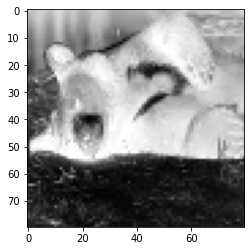

In [5]:
plt.imshow(x_train[4],cmap=plt.cm.gray_r)
plt.show()

In [6]:
cleanXYData()
pathV = r'C:\Users\Vive Wireless\Desktop\Repte2\data\validation'
validImg =  MasterImage(PATH=pathV,IMAGE_SIZE=80)
x_valid, y_valid = validImg.load_dataset()

Could not Found Pickle File 
Loading File and Dataset  ..........
Found Categories  ['animals', 'tools'] 

Pickled Image Successfully 


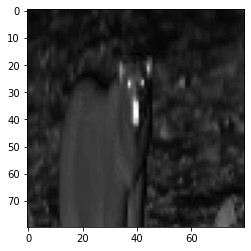

In [7]:
plt.imshow(x_valid[4],cmap=plt.cm.gray_r)
plt.show()

In [8]:
cleanXYData()
pathTe = r'C:\Users\Vive Wireless\Desktop\Repte2\data\test'
testImg =  MasterImage(PATH=pathTe,IMAGE_SIZE=80)
x_test, y_test = testImg.load_dataset()

Could not Found Pickle File 
Loading File and Dataset  ..........
Found Categories  ['animals', 'tools'] 

Pickled Image Successfully 


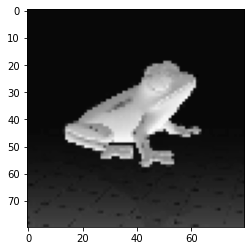

In [20]:
plt.imshow(x_test[10],cmap=plt.cm.gray_r)
plt.show()

### MODEL 


In [10]:
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(80,80, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(2, activation='sigmoid'))

In [11]:
model.compile(
  'adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [12]:
to_categorical(y_valid)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

### FITTING

In [13]:
model.fit(
  x_train,
  to_categorical(y_train),
  epochs=300,
  validation_data=(x_valid,to_categorical(y_valid)),
)

#model.predict()

Epoch 1/300
135/135 [==============================] - 29s 215ms/step - loss: 0.5150 - accuracy: 0.7380 - val_loss: 0.3787 - val_accuracy: 0.8763
Epoch 2/300
135/135 [==============================] - 29s 216ms/step - loss: 0.4129 - accuracy: 0.8381 - val_loss: 0.3149 - val_accuracy: 0.8968
Epoch 3/300
135/135 [==============================] - 29s 216ms/step - loss: 0.3758 - accuracy: 0.8501 - val_loss: 0.3177 - val_accuracy: 0.8986
Epoch 4/300
135/135 [==============================] - 29s 217ms/step - loss: 0.3647 - accuracy: 0.8550 - val_loss: 0.2839 - val_accuracy: 0.9067
Epoch 5/300
135/135 [==============================] - 29s 216ms/step - loss: 0.3417 - accuracy: 0.8633 - val_loss: 0.3194 - val_accuracy: 0.8924
Epoch 6/300
135/135 [==============================] - 30s 219ms/step - loss: 0.3176 - accuracy: 0.8747 - val_loss: 0.3129 - val_accuracy: 0.8954
Epoch 7/300
135/135 [==============================] - 29s 217ms/step - loss: 0.2981 - accuracy: 0.8835 - val_loss: 0.3017 -

Epoch 57/300
135/135 [==============================] - 30s 221ms/step - loss: 0.0092 - accuracy: 0.9979 - val_loss: 0.7063 - val_accuracy: 0.9150
Epoch 58/300
135/135 [==============================] - 30s 222ms/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.6502 - val_accuracy: 0.9104
Epoch 59/300
135/135 [==============================] - 30s 221ms/step - loss: 0.0322 - accuracy: 0.9896 - val_loss: 0.4111 - val_accuracy: 0.9338
Epoch 60/300
135/135 [==============================] - 30s 223ms/step - loss: 0.0228 - accuracy: 0.9947 - val_loss: 0.4033 - val_accuracy: 0.9297
Epoch 61/300
135/135 [==============================] - 30s 222ms/step - loss: 0.0165 - accuracy: 0.9944 - val_loss: 0.4494 - val_accuracy: 0.9379
Epoch 62/300
135/135 [==============================] - 30s 223ms/step - loss: 0.0213 - accuracy: 0.9937 - val_loss: 0.4904 - val_accuracy: 0.9327
Epoch 63/300
135/135 [==============================] - 30s 223ms/step - loss: 0.0086 - accuracy: 0.9970 - val_loss: 0

135/135 [==============================] - 30s 223ms/step - loss: 0.0106 - accuracy: 0.9979 - val_loss: 0.4819 - val_accuracy: 0.9442
Epoch 168/300
135/135 [==============================] - 30s 222ms/step - loss: 0.0104 - accuracy: 0.9977 - val_loss: 0.6218 - val_accuracy: 0.9338
Epoch 169/300
135/135 [==============================] - 30s 222ms/step - loss: 0.0061 - accuracy: 0.9975 - val_loss: 0.7328 - val_accuracy: 0.9313
Epoch 170/300
135/135 [==============================] - 30s 222ms/step - loss: 0.0062 - accuracy: 0.9984 - val_loss: 0.6679 - val_accuracy: 0.9297
Epoch 171/300
135/135 [==============================] - 30s 221ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.8349 - val_accuracy: 0.9166
Epoch 172/300
135/135 [==============================] - 30s 221ms/step - loss: 0.0610 - accuracy: 0.9884 - val_loss: 0.6726 - val_accuracy: 0.9195
Epoch 173/300
135/135 [==============================] - 30s 222ms/step - loss: 0.0269 - accuracy: 0.9924 - val_loss: 0.7377 -

135/135 [==============================] - 30s 221ms/step - loss: 0.0248 - accuracy: 0.9963 - val_loss: 0.8228 - val_accuracy: 0.9274
Epoch 278/300
135/135 [==============================] - 30s 220ms/step - loss: 0.0093 - accuracy: 0.9972 - val_loss: 0.8825 - val_accuracy: 0.9357
Epoch 279/300
135/135 [==============================] - 30s 221ms/step - loss: 0.0079 - accuracy: 0.9975 - val_loss: 1.0875 - val_accuracy: 0.9232
Epoch 280/300
135/135 [==============================] - 30s 220ms/step - loss: 0.0174 - accuracy: 0.9965 - val_loss: 0.7666 - val_accuracy: 0.9276
Epoch 281/300
135/135 [==============================] - 30s 221ms/step - loss: 0.0049 - accuracy: 0.9977 - val_loss: 1.1824 - val_accuracy: 0.9131
Epoch 282/300
135/135 [==============================] - 30s 221ms/step - loss: 0.0052 - accuracy: 0.9981 - val_loss: 0.7547 - val_accuracy: 0.9400
Epoch 283/300
135/135 [==============================] - 30s 220ms/step - loss: 0.0227 - accuracy: 0.9956 - val_loss: 0.9813 -

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 78, 78, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0

In [14]:
predictions = model.predict(x_test[:82])
print("predictions shape:", predictions)

predictions shape: [[9.98074293e-01 1.88887119e-03]
 [8.99755955e-03 9.90972817e-01]
 [9.98227119e-01 1.83773041e-03]
 [1.00000000e+00 7.45951390e-09]
 [9.96112823e-01 3.98787856e-03]
 [9.99636292e-01 3.58521938e-04]
 [9.99986053e-01 1.41661840e-05]
 [1.00000000e+00 2.71248898e-13]
 [1.00000000e+00 9.19532159e-11]
 [9.87249792e-01 1.26245320e-02]
 [4.11292613e-02 9.58494902e-01]
 [9.77933645e-01 2.17672586e-02]
 [9.99817729e-01 1.71244144e-04]
 [2.75375646e-06 9.99997258e-01]
 [6.01232231e-01 3.93491507e-01]
 [1.00000000e+00 6.81208312e-10]
 [9.99999762e-01 2.12037079e-07]
 [1.00000000e+00 1.14666285e-08]
 [9.99998033e-01 2.02683418e-06]
 [9.97531235e-01 2.34284997e-03]
 [9.96710181e-01 3.23227048e-03]
 [9.96168494e-01 3.82009149e-03]
 [9.97068286e-01 2.89723277e-03]
 [2.07549334e-02 9.79099929e-01]
 [1.00000000e+00 3.34059145e-08]
 [9.99957323e-01 3.62719657e-05]
 [9.99999762e-01 3.11243326e-07]
 [9.99975920e-01 2.17413472e-05]
 [1.44422054e-03 9.98580217e-01]
 [9.99805689e-01 1.81972

### TEST

In [17]:
print("Evaluate on test data")
results = model.evaluate(x_test, to_categorical(y_test))
print("test loss, test acc:", results)

Evaluate on test data
5/5 [==============================] - 0s 18ms/step - loss: 1.6586 - accuracy: 0.7829
test loss, test acc: [1.6585861444473267, 0.7829457521438599]
